In [1]:
!pip install tensorflow
!pip install kaggle


In [2]:
from google.colab import files
files.upload()  # Загрузите ваш kaggle.json файл

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Скачивание датасета
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Распаковка
!unzip brain-mri-images-for-brain-tumor-detection.zip


Saving 2019-06-07_VGG_model.h5 to 2019-06-07_VGG_model.h5
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 277MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Пути к изображениям
path = './brain_tumor_dataset'
categories = ['yes', 'no']  # yes = есть опухоль, no = здоровый

data = []
labels = []

for category in categories:
    folder_path = os.path.join(path, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128))
        data.append(image)
        labels.append(1 if category == 'yes' else 0)

data = np.array(data)
labels = np.array(labels)

# Нормализация данных
data = data / 255.0

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)


In [4]:
model = Sequential()

# Добавляем свёрточные слои
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
7/7 [==============================] - 2s 128ms/step - loss: 0.7743 - accuracy: 0.6287 - val_loss: 0.5944 - val_accuracy: 0.7451
Epoch 2/10
7/7 [==============================] - 1s 91ms/step - loss: 0.4917 - accuracy: 0.8119 - val_loss: 0.6235 - val_accuracy: 0.7647
Epoch 3/10
7/7 [==============================] - 1s 85ms/step - loss: 0.4366 - accuracy: 0.8366 - val_loss: 0.5655 - val_accuracy: 0.7843
Epoch 4/10
7/7 [==============================] - 1s 89ms/step - loss: 0.3828 - accuracy: 0.8366 - val_loss: 0.6698 - val_accuracy: 0.7451
Epoch 5/10
7/7 [==============================] - 1s 91ms/step - loss: 0.3118 - accuracy: 0.8713 - val_loss: 0.5654 - val_accuracy: 0.8039
Epoch 6/10
7/7 [==============================] - 1s 92ms/step - loss: 0.2528 - accuracy: 0.9109 - val_loss: 0.5783 - val_accuracy: 0.7647
Epoch 7/10
7/7 [==============================] - 1s 94ms/step - loss: 0.1951 - accuracy: 0.9406 - val_loss: 0.8227 - val_accuracy: 0.7647
Epoch 8/10
7/7 [==========

2/2 [==============================] - 0s 13ms/step - loss: 0.7388 - accuracy: 0.8039
Accuracy: 80.39%


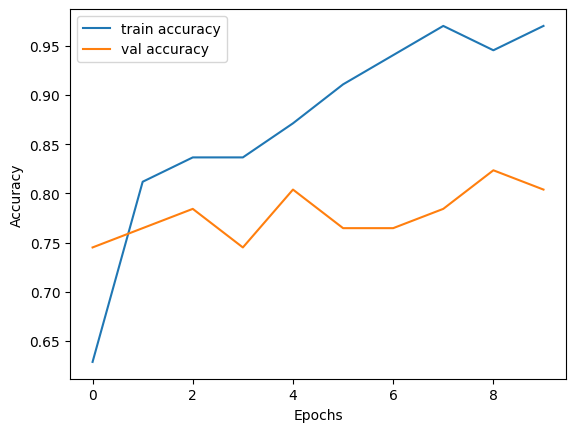

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Визуализация результатов
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
